In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<center> 

# Introduction to Data Science with Python

## Amanda Jotte - University of Chicago - Data Science Institute
## Phoenix Week 2024

    
<img src="https://raw.githubusercontent.com/amandakube/Data118LectureImages/main/UChicago_DSI.png" alt="UC-DSI" width="600" height="700">
    
</center>

## Today

* What is Data Science?
* Case Study
* A little Python

## How to access these slides

## So what is Data Science?


<center> 

<img src="https://raw.githubusercontent.com/amandakube/Data118LectureImages/main/DSReviews.png" alt="Data Science Reviews">
    
</center>

## Data Science is the study of...

* Extracting value from data (Jeannette Wing)
* Learning from data (David Donoho)
* Holistic data science requires that we understand the context of data, appreciate the responsibilities involved in using private and public data, and clearly communicate what a dataset can and cannot tell us about the world. [...]
* Data science is more than the combination of statistics and computer science – it requires training in how to weave statistical and computational techniques into a larger framework, problem by problem, and to address discipline-specific questions. (Blei and Smyth, PNAS Aug 15, 2017)


## What is Data Science? - My 2 Cents

* Interdisciplinary / Collaboratory  
* Extract knowledge from data
[noisy, experimental, observational, text, scraping, mining]  
* Apply knowledge to domain  

Building your tool box

Data Science increasingly used to feed AI BUT IS NOT SYNONYMOUS WITH ML/AI!



<center> 

<img src="https://raw.githubusercontent.com/amandakube/Data118LectureImages/main/DSVennDiagram.png" alt="Data Science Venn Diagram" width="500" height="600">
    
</center>







## What is Data Science at UChicago?

DSI Mission: “[To] address important scientific and societal questions through coordinated advances in applications, models, algorithms, and platforms”



<center> 

<img src="https://raw.githubusercontent.com/amandakube/Data118LectureImages/main/UCDS.png" alt="Data Science Image UChicago" width="500" height="600">
    
</center>

### Data Science isn't truly new...

<center> 

<img src="https://raw.githubusercontent.com/amandakube/phoenix-week/main/history_of_ds.png" alt="Data Science History" width="80%">
    
</center>

### ...we just have more data and computing power now

<center> 

<img src="https://raw.githubusercontent.com/amandakube/Data118LectureImages/main/BigData.png" alt="Big Data" width="70%">
    
</center>

### And Data Scientists are in demand!

<center> 

<img src="https://raw.githubusercontent.com/amandakube/Data118LectureImages/main/DSDemand.png" alt="Data Science Demand" width="80%">
    
</center>

## Talk to Your Neighbor

1. What real world or scientific problem would you like to solve with Data Science? 
2. What datasets would you need and where or how would you get them? 
3. When solving the problem you describe, are there any special challenges you are worried about?


## Now let's try one together

A case study adapted from the Skew The Script curriculum (skewthescript.org)

We will be talking about difficult but important topics related to race and policing. Be respectful of your peers, and if you need to step out at any time, please do.

Stop and Frisk in New York City - Was there racial discrimination?

## How would we answer this question?


Step 1. Find data - What kind of data?

Step 2. Analyse that data - How??

## I found the data for us...

You can access it [here](https://tinyurl.com/stop-and-frisk-data)

Contains real 2011 data from Stop and Frisk program, filtered to only include 3 most common racial groups stopped: Black, Hispanic, and White.


What does it look like?

In [95]:
stops = pd.read_csv("https://docs.google.com/spreadsheets/d/1j5GRWrH8ikqMqwKi8Y9WHGjbxCPvL0_VkdBaeNMtU0g/export?gid=0&format=csv")
stops.head()

,Precinct,Suspect Gender,Suspect Age,Suspect Race,Crime Suspected,Arrest Made?,Highest Force Level Used
0,115,M,15,B,FEL,N,none
1,100,M,17,B,CPW,N,pf_wall
2,100,M,17,B,CPW,N,pf_hands
3,100,M,20,B,CPW,N,pf_hands
4,100,M,17,B,CPW,N,pf_wall


## Here is the codebook:

https://docs.google.com/spreadsheets/d/1j5GRWrH8ikqMqwKi8Y9WHGjbxCPvL0_VkdBaeNMtU0g/edit?gid=638822377#gid=638822377

## Now, how can we work with this data in python?

We need to know basic *syntax* (Coding languages are extremely literal)

"the arrangement of words and phrases to create well-formed sentences in a language"

AKA coding grammar


You learned some of this already - What data types do you see?

## What about `Arrest Made?`?


## Let's start exploring the data

Who do police tend to stop?

We need a **marginal distribution**

Marginal Distribution: The breakdown of one variable (in this case, race).

In [109]:
marginal = stops.groupby('Suspect Race')[['Precinct']].count().transpose().rename(index={'Precinct': 'Number Stopped'})
marginal

Suspect Race,B,H,W
Number Stopped,348675,222574,61472


Proportions and percentages are more useful than counts...

In [97]:
marginal_prop = marginal / (348675 + 222574 + 61472) * 100
marginal_prop

Suspect Race,B,H,W
Number Stopped,55.107227,35.177274,9.715499


Police stop Black civilians a majority(55.1%) of the time

Police stop Black and Hispanic civilians a large majority (90.3%) of the time.

Maybe 55.1% of New York City is Black...

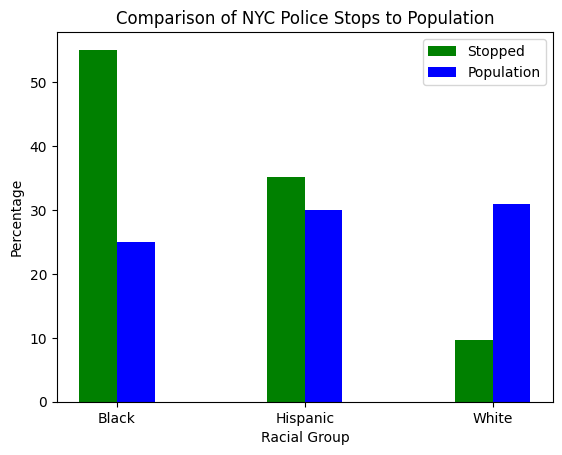

In [98]:
population = np.array([25,30,31])
x = np.arange(3) 
plt.bar(x-0.1, marginal_prop.loc['Number Stopped'].values, 0.2, color='green') 
plt.bar(x+0.1, population, 0.2, color='blue') 
plt.xticks(x, ['Black', 'Hispanic', 'White']) 
plt.xlabel("Racial Group") 
plt.ylabel("Percentage") 
plt.legend(["Stopped", "Population"]) 
plt.title("Comparison of NYC Police Stops to Population")
plt.show()

## What do you notice?

Black civilians are stopped at a disproportionately high rate...

## The Mayor's Argument

"People say, 'Oh my God, you are arresting kids for marijuana who are all minorities.'Yes, that's true. Why? Because we put all the cops in the minority neighborhoods. Yes, that's true. Why'd we do it? Because that's where all the crime is." - Michael Bloomberg

Is he right? - Ignore politics, use data!

## Let's explore this making a two-way table for cross-classification

Two-Way Table: A table of counts describing two categorical variables. Each margin represents one variable.

In [99]:
twoway = pd.pivot_table(stops, index = 'Arrest Made?', columns = 'Suspect Race', values = 'Precinct', aggfunc = 'count')
twoway

Suspect Race,B,H,W
Arrest Made?,,,
N,327977,209463,57301
Y,20698,13111,4171


We can make this a bit prettier

In [100]:
twoway = twoway.rename(
    columns={'B': 'Black',"H": "Hispanic", 'W': "White"}, index={'N': 'No Arrest', 'Y': 'Arrest'})
twoway

Suspect Race,Black,Hispanic,White
Arrest Made?,,,
No Arrest,327977,209463,57301
Arrest,20698,13111,4171


More total arrests are made in Black and Hispanic populations

Does this support the Mayor's claim?

## Conditional Distribution - Something to compare to

The total number of stops for each race is different... we need to know the number of arrests out of the total FOR EACH racial group!

This is a conditional distribution - the numbers CONDITIONED on racial group

What percent of people were arrested, given they're black? Given they're white?

To get a **conditional distribution**, we combine what we know from **marginal distributions** and **two-way tables** 

In [101]:
column_sums = twoway.sum().to_frame().transpose().rename(index={0:'Totals'})
row_sums = twoway.sum(axis=1).to_frame().rename(columns={0:'Totals'})
marginals = pd.concat([pd.concat([twoway,column_sums]),row_sums], axis = 1)
marginals.loc['Totals','Totals'] = marginals.Totals.sum()
marginals

,Black,Hispanic,White,Totals
No Arrest,327977,209463,57301,594741.0
Arrest,20698,13111,4171,37980.0
Totals,348675,222574,61472,632721.0


In [102]:
conditionals = (marginals / marginals.loc['Totals'] * 100).drop(index=['Totals'])
conditionals

,Black,Hispanic,White,Totals
No Arrest,94.063813,94.109375,93.214797,93.997354
Arrest,5.936187,5.890625,6.785203,6.002646


Arrest rates are very low and similar across races

Michael Bloomberg has retracted his statement and no longer supports stop-and-frisk

## Lingering Questions...

Is the association we found statistically significant?
Are these racial differences big enough to prove they didn’t happen by chance alone?

Need **statistical testing** - beyond scope of this lecture

## But wait!

What if we analyzed the data this way:

Of all arrests, how many people arrested were black?

In [103]:
marginals.loc[['Arrest']] / marginals.loc['Arrest','Totals'] * 100

,Black,Hispanic,White,Totals
Arrest,54.497104,34.5208,10.982096,100.0


Does this support Bloomberg's claim?

If crime rates are equal, you'll find the most crimes among the populations you police the most.

Another way to look at it: Among all stops that didn't find crime, about 55% were Black civilians. Since the majority of stops were of Black civilians, they make up the majority of stops that found crime and stops that didn't find crime. So, focusing on just the stops that found crime can be misleading.

## Here's another question

Is force used more often in Black and Hispanic populations?

In [104]:
twoway = pd.pivot_table(stops, index = 'Highest Force Level Used', columns = 'Suspect Race', values = 'Precinct', aggfunc = 'count')
twoway

Suspect Race,B,H,W
Highest Force Level Used,,,
none,274260,170633,52040
pf_baton,34,29,7
pf_drwep,342,183,64
pf_grnd,992,584,135
pf_hands,52676,37620,5904
pf_hcuff,11005,6596,1905
pf_pepsp,61,27,7
pf_ptwep,983,501,131
pf_wall,8322,6401,1279


Let's aggregate some of the force levels and make this table look nicer.

In [105]:
keeps = twoway.iloc[[0,4]]
combine = twoway.iloc[[1,2,3,5,6,7,8]].sum().to_frame().transpose()
twoway_clean = pd.concat([keeps,combine]).rename(
    columns={'B': 'Black',"H": "Hispanic", 'W': "White"}, index={'none': 'No force', 'pf_hands': 'Hands', 0:'Higher force'})
twoway_clean

Suspect Race,Black,Hispanic,White
No force,274260,170633,52040
Hands,52676,37620,5904
Higher force,21739,14321,3528


### Do you agree?

"Police had 'no force' interactions with 52,040 white suspects. Meanwhile, a much higher number of black suspects - 274,260 - didn't experience force. Clearly, black people experience 'force-free' interactions with police
more frequently than white people." - Television Commentator

In [106]:
column_sums = twoway_clean.sum().to_frame().transpose().rename(index={0:'Totals'})
row_sums = twoway_clean.sum(axis=1).to_frame().rename(columns={0:'Totals'})
marginals = pd.concat([pd.concat([twoway_clean,column_sums]),row_sums], axis = 1)
marginals.loc['Totals','Totals'] = marginals.Totals.sum()
marginals

,Black,Hispanic,White,Totals
No force,274260,170633,52040,496933.0
Hands,52676,37620,5904,96200.0
Higher force,21739,14321,3528,39588.0
Totals,348675,222574,61472,632721.0


In [107]:
conditionals = (marginals / marginals.loc['Totals'] * 100).drop(index=['Totals'])
conditionals

,Black,Hispanic,White,Totals
No force,78.657776,76.663492,84.656429,78.539040
Hands,15.107478,16.902244,9.604373,15.204174
Higher force,6.234746,6.434265,5.739198,6.256786


## Discussion

1. The use of proper conditioning is extremely important and often left out! Can you think of an example?

2. A comparison group or context (like comparing stop rates to the population) can be crucial to making a claim not just in data science, but in most fields! In what other contexts is it important to have something to compare to?

3. Here we used data to assess something frequently argued over. Since we had data on all stops in 2011, we could easily answer our questions. It is easy to think that data is always less biased than humans. Can you think of a time when this might not be true?

4. Understanding the context or domain you are working in can help you identify times when data is not unbiased.
 - polling (https://fortune.com/img-assets/wp-content/uploads/2020/11/11.04.20.Dewey-beats-Truman.GettyImages-50691683.jpg?w=1440&q=75)
 - recidivism